In [44]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [45]:

df=pd.read_excel('xproject.xlsx',index_col=0)

In [46]:
df


,Monthly_ADT
Count_month,
2015-01-01,1123
2015-02-01,2345
2015-03-01,4567
2015-04-01,1222
2015-05-01,3014
2015-06-01,3225
2015-07-01,1679
2015-08-01,3678
2015-09-01,1666


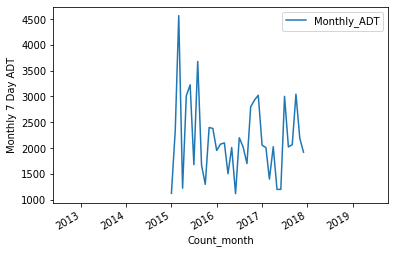

In [95]:
df.plot()
plt.xlim('2012-05-25', '2019-10-15')
plt.ylabel('Monthly 7 Day ADT');


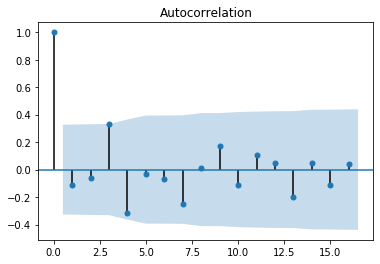

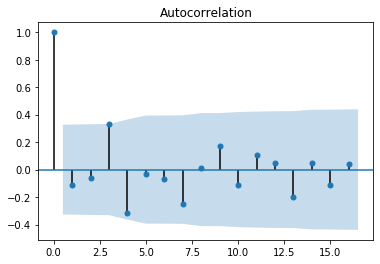

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

# Graphs

In [49]:
sentiment_short = df.ix['2015':'2018']

# Stationary Determination and Conversion

In [51]:
df.head()

,Monthly_ADT
Count_month,
2015-01-01,1123
2015-02-01,2345
2015-03-01,4567
2015-04-01,1222
2015-05-01,3014


# Differencing

In [52]:
df_diff=df.diff(periods=1)

In [53]:
df_diff=df_diff[1:]
df_diff.head()

,Monthly_ADT
Count_month,
2015-02-01,1222.0
2015-03-01,2222.0
2015-04-01,-3345.0
2015-05-01,1792.0
2015-06-01,211.0


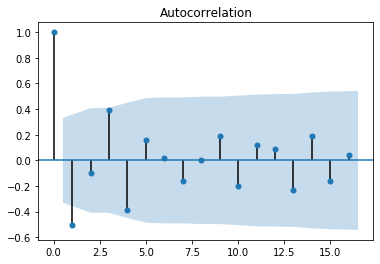

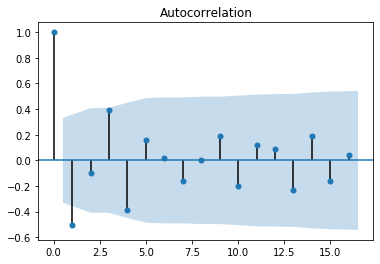

In [54]:
plot_acf(df_diff)

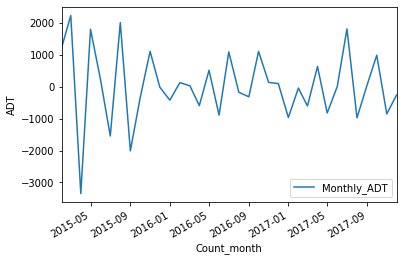

In [98]:
df_diff.plot()
plt.ylabel('ADT');


# Train And Test Data
31 Train Data and 5 Test Data

In [69]:
X=df.values
train=X[0:31] #
test=X[31:]

train_a=df[0:31]
test_a=df[31:]

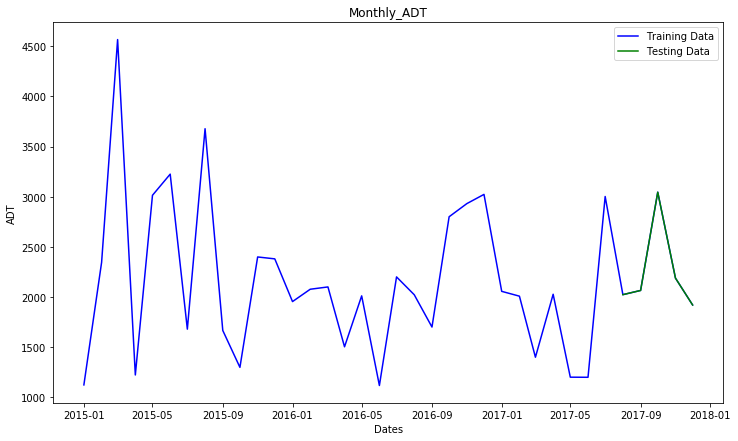

In [70]:
plt.figure(figsize=(12,7))
plt.title('Monthly_ADT')
plt.xlabel('Dates')
plt.ylabel('ADT')
plt.plot(df['Monthly_ADT'], 'blue', label='Training Data')
plt.plot(test_a['Monthly_ADT'], 'green', label='Testing Data')

plt.legend()

In [71]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [72]:
#train_a=train['Monthly_ADT'].values
#test_a=test['Monthly_ADT'].values

# AR

In [73]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar=AR(train)
model_ar_fit=model_ar.fit()

In [74]:
predictions=model_ar_fit.predict(start=26,end=36)

In [75]:
test

array([[2023],
       [2065],
       [3045],
       [2188],
       [1920]])

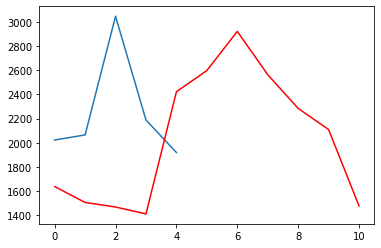

In [76]:
plt.plot(test)
plt.plot(predictions,color='red')

# Determining Best Values(p,d,q) for ARIMA Model

In [78]:
import warnings
import itertools
warnings.filterwarnings('ignore')

p=d=q=range(0,5)
pdq=(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 506.72388468300073
(0, 0, 1) 508.3544133068814
(0, 0, 2) 510.1839853773073
(0, 0, 3) 502.2298191344249
(0, 0, 4) 504.151349297506
(0, 1, 0) 513.9320481069769
(0, 1, 1) 495.83588118355385
(0, 1, 3) 498.8067460531415
(0, 2, 0) 528.4033700841605
(0, 2, 1) 503.3159349965076
(1, 0, 0) 508.3670267771992
(1, 0, 1) 510.35264471109383
(1, 1, 0) 507.17156070583655
(1, 1, 2) 498.988316196349
(1, 2, 0) 514.6393237283609
(1, 2, 1) 497.63064233860723
(2, 0, 0) 510.2732263290704
(2, 0, 1) 505.0226315295176
(2, 1, 0) 493.7913689280577
(2, 1, 1) 493.97416066668933
(2, 1, 2) nan
(2, 1, 3) 500.80636328395036
(2, 1, 4) 496.710248356573
(2, 2, 0) 490.29392743210997
(2, 2, 1) 486.0128399730621
(3, 0, 0) 507.0947718712773
(3, 0, 1) 502.5150201278657
(3, 0, 2) nan
(3, 1, 0) 494.8408039705775
(3, 1, 1) 492.6105033727486
(3, 1, 2) nan
(3, 1, 3) nan
(3, 1, 4) nan
(3, 2, 0) 491.5571809505011
(3, 2, 1) nan
(4, 0, 0) 504.5874124058567
(4, 0, 1) 506.3236941223067
(4, 0, 2) nan
(4, 0, 3) nan
(4, 0, 4) nan
(

# ARIMA Model

In [79]:
from statsmodels.tsa.arima_model import ARIMA

predicted=1501.000000, expected=2023.000000
predicted=2331.000000, expected=2065.000000
predicted=2322.000000, expected=3045.000000
predicted=2196.000000, expected=2188.000000
predicted=2091.000000, expected=1920.000000


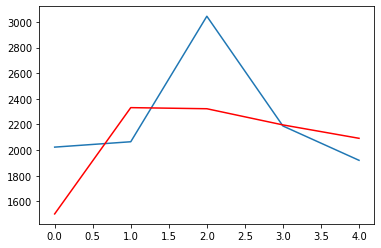

In [87]:
dfObj = pd.DataFrame(columns=['Predicted', 'Actual','Error%'])
dfObj1=pd.DataFrame(columns=['Predicted', 'Actual'])
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,0,1))
    model_fit = model.fit(disp=1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    obs=int(obs)
    yhat=int(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    error=(obs-yhat)/100
    #error=int(error)
    error=abs(error)
    dfObj= dfObj.append({'Predicted': yhat,'Actual': obs,'Error%':error}, ignore_index=True)
    dfObj1=dfObj1.append({'Predicted': yhat,'Actual': obs},ignore_index=True)
    
    
    

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

# Error Calculation

In [89]:
dfObj

,Predicted,Actual,Error%
0,1501.0,2023.0,5.22
1,2331.0,2065.0,2.66
2,2322.0,3045.0,7.23
3,2196.0,2188.0,0.08
4,2091.0,1920.0,1.71


In [90]:
dfObj1

,Predicted,Actual
0,1501,2023
1,2331,2065
2,2322,3045
3,2196,2188
4,2091,1920


In [32]:
dfObj.dtypes

Predicted    object
Actual       object
Error%       object
dtype: object

# Predicted vs Actual Graph


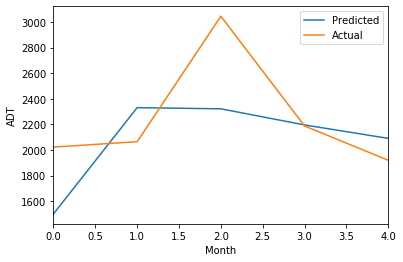

In [100]:
dfObj1.plot(kind="line")
plt.xlabel('Month');
plt.ylabel('ADT');

In [30]:
from sklearn import metrics
import numpy as np

In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test, predictions)))

Mean Absolute Error: 338.0958525264201
Mean Squared Error: 178840.396997139
Root Mean Squared Error: 422.8952553495239


# Mean Absolute Percentage Error (MAPE) Calculation

In [32]:

error2 = smape_kun(test, predictions)
accuracy=100-error2

print('Symmetric mean absolute percentage error: %.3f' % error2)


Symmetric mean absolute percentage error: 15.515


# Results

In [33]:
error2=str(error2)
accuracy=str(accuracy)
print("As the MAPE is " +  error2  + " the accuracy is "+ accuracy)

As the MAPE is 15.515491118239334 the accuracy is 84.48450888176066


# P,D,Q Calculation

In [34]:
import warnings
import itertools
warnings.filterwarnings('ignore')

p=d=q=range(0,5)
pdq=(itertools.product(p,d,q))

for param in pdq:
    try:
        model_arima=ARIMA(train,order=param)
        model_arima_fit=model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 506.72388468300073
(0, 0, 1) 508.3544133068814
(0, 0, 2) 510.1839853773073
(0, 0, 3) 502.2298191344249
(0, 0, 4) 504.151349297506
(0, 1, 0) 513.9320481069769
(0, 1, 1) 495.83588118355385
(0, 1, 3) 498.8067460531415
(0, 2, 0) 528.4033700841605
(0, 2, 1) 503.3159349965076
(1, 0, 0) 508.3670267771992
(1, 0, 1) 510.35264471109383
(1, 1, 0) 507.17156070583655
(1, 1, 2) 498.988316196349
(1, 2, 0) 514.6393237283609
(1, 2, 1) 497.63064233860723
(2, 0, 0) 510.2732263290704
(2, 0, 1) 505.0226315295176
(2, 1, 0) 493.7913689280577
(2, 1, 1) 493.97416066668933
(2, 1, 2) nan
(2, 1, 3) 500.80636328395036
(2, 1, 4) 496.710248356573
(2, 2, 0) 490.29392743210997
(2, 2, 1) 486.0128399730621
(3, 0, 0) 507.0947718712773
(3, 0, 1) 502.5150201278657
(3, 0, 2) nan
(3, 1, 0) 494.8408039705775
(3, 1, 1) 492.6105033727486
(3, 1, 2) nan
(3, 1, 3) nan
(3, 1, 4) nan
(3, 2, 0) 491.5571809505011
(3, 2, 1) nan
(4, 0, 0) 504.5874124058567
(4, 0, 1) 506.3236941223067
(4, 0, 2) nan
(4, 0, 3) nan
(4, 0, 4) nan
(

# Three Year Analysis


In [38]:
X=df.values
train=X[0:31] #
test=X[0:31]

train_a=df[0:31]
test_a=df[0:31]

predicted=1501.000000, expected=1123.000000
predicted=2149.000000, expected=2345.000000
predicted=2602.000000, expected=4567.000000
predicted=1849.000000, expected=1222.000000
predicted=2116.000000, expected=3014.000000
predicted=3289.000000, expected=3225.000000
predicted=901.000000, expected=1679.000000
predicted=3483.000000, expected=3678.000000
predicted=1934.000000, expected=1666.000000
predicted=2157.000000, expected=1298.000000
predicted=3130.000000, expected=2399.000000
predicted=1439.000000, expected=2380.000000
predicted=2394.000000, expected=1954.000000
predicted=2113.000000, expected=2077.000000
predicted=2402.000000, expected=2100.000000
predicted=1966.000000, expected=1503.000000
predicted=2303.000000, expected=2011.000000
predicted=2126.000000, expected=1117.000000
predicted=1806.000000, expected=2200.000000
predicted=2520.000000, expected=2022.000000
predicted=1414.000000, expected=1700.000000
predicted=2795.000000, expected=2800.000000
predicted=1677.000000, expected=2

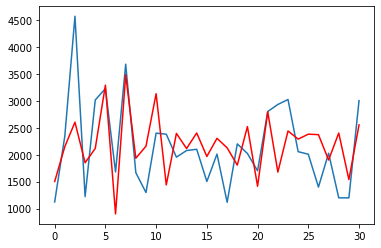

In [39]:
dfObj = pd.DataFrame(columns=['Predicted', 'Actual','Error%'])
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(3,0,1))
    model_fit = model.fit(disp=1)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    obs=int(obs)
    yhat=int(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))
    error=(obs-yhat)/100
    #error=int(error)
    error=abs(error)
    dfObj= dfObj.append({'Predicted': yhat,'Actual': obs,'Error%':error}, ignore_index=True)
    
    
    
    

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [40]:
dfObj

,Predicted,Actual,Error%
0,1501.0,1123.0,3.78
1,2149.0,2345.0,1.96
2,2602.0,4567.0,19.65
3,1849.0,1222.0,6.27
4,2116.0,3014.0,8.98
5,3289.0,3225.0,0.64
6,901.0,1679.0,7.78
7,3483.0,3678.0,1.95
8,1934.0,1666.0,2.68
9,2157.0,1298.0,8.59


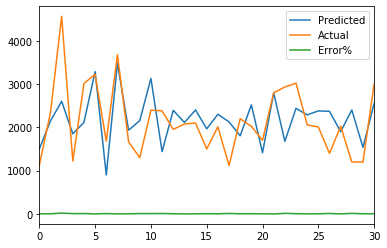

In [43]:
dfObj.plot(kind="line")